In [1]:
'''Importing Modules'''

# Essentials
import pandas as pd
import numpy as np
import collections

#Visualization tools
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from wordcl
oud import WordCloud

# Sk learn utilities
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Clasification algorithms
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#lstm utilities
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, GlobalMaxPooling1D, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

In [2]:
'''Visualization and analysis setup'''

import warnings
warnings.filterwarnings('ignore')

mpl.style.use(['https://gist.githubusercontent.com/BrendanMartin/01e71bb9550774e2ccff3af7574c0020/raw/6fa9681c7d0232d34c9271de9be150e584e606fe/lds_default.mplstyle'])
mpl.rcParams.update({
    "axes.titlepad": 22.0,
})
sns.set_style('dark')

In [3]:
'''Importing dataset'''

tweets_df = pd.read_csv('2.3-labelled-tweets.csv')

#Remove this later
# tweets_df = tweets_df.loc[:1000]
# tweets_df.head()

tweets_df

,tweets,cleaned_tweets,inltk_cleaned_tweets,label
0,जुम्राको उत्पति को कथा त कास्टिङ मात्र हो हेर्...,जुम्रा उत्पति कथा कास्टिङ हेर् गर्नुस दुनिया र...,▁जु म् रा ▁उत्पति ▁कथा स्ट िङ ▁हे र् स ▁दुनिया...,0
1,स्याङ्जाको पुतलीबजार नगरपालिका गण्डकी प्रदेशको...,स्याङ्जा पुतलीबजार नगरपालि गण्ड प्रदेश कोभिड१९...,▁स्याङ्जा ▁पुतलीबजार ▁नगर पा लि ▁ग ण्ड ▁प्रदेश...,1
2,फेक मिडिया गरेर दुनियाँमा अफबाह फैलाउनेलाई भाट...,फेक मिडिया दुनियाँ अफबाह फैलाउ भाटा हान् सरकार...,▁फे क ▁मिडिया ▁दुनियाँ ▁अफ बाह ▁फैल ा उ ▁भा टा...,0
3,चाइनाने कोरोना फैलाउछ र किटमास्क बेच्छ अमेरिका...,चाइना फैलाउ किटमास्क बेच् अमेरिका युद्ध फैलाउ ...,▁ चाइना ▁फैल ा उ ट स्क ▁बेच ् ▁अमेरिका ▁युद्ध ...,0
4,जोर र बिजोर ले अर्थतन्त्र लाईन मा आउने भए तेत्...,जोर बिजोर अर्थतन्त्र लाईन आउ तेत्रो संक्रमण बे...,▁जोर ▁बि जोर ▁अर्थतन्त्र ▁लाईन ▁आउ ▁ते त्रो ▁स...,0
...,...,...,...,...
28565,कोरोना भाईरस बिशेष गीत समूह बिश्व भरी कोरोना भ...,भाईरस गीत समूह बिश्व भरी भाईरस महामारी भाईरस प...,▁भाई रस ▁गीत ▁समूह ▁बिश्व ▁भरी ▁भाई रस ▁महामार...,1
28566,सम्मान गर साथीहरुलाई अपमान होइन सत्ताको तातो र...,सम्मान सा अपमान सत्ता तातो राप निस्क कठोर शब्द...,▁सम्मान ▁सा ▁अपमान ▁सत्ता ▁तातो ाप ▁निस्क ▁कठो...,1
28567,कोरोना कहरले दुई वर्ष हुन नसकेको माध्यमिक शिक्...,कहर वर्ष नसक माध्यमिक शिक्षा परीक्षा यसवर्ष आज...,▁कह ▁वर्ष सक ▁माध्यमिक ▁शिक्षा ▁परीक्षा वर्ष ▁...,1
28568,काठमाडौँको मेयरको प्रदिस्पर्दमा त मिस्टर भिसिट...,काठमाडौँ मेयर प्रदिस्पर्द मिस्टर भिसिट उर्फ को...,▁काठमाडौँ ▁मेयर ▁प्र दि स्प र्द ▁मिस्ट ▁भि सि ...,0


In [4]:
# to_remove = np.random.choice(tweets_df[tweets_df['label']==1].index,size=1390,replace=False)
# # len(to_remove)
# tweets_df = tweets_df.drop(to_remove)

In [5]:
# tweets_df = tweets_df.reset_index(drop=False)
# tweets_df.drop('index', inplace=True, axis=1)

In [6]:
# tweets_df

In [7]:
'''Finding labels and label count in dataset'''

(unique, counts) = np.unique(tweets_df['label'], return_counts=True)
print('Unique values of the label variable', unique)
print('Counts of the label variable :', counts)

Unique values of the label variable [0 1]
Counts of the label variable : [13590 14980]


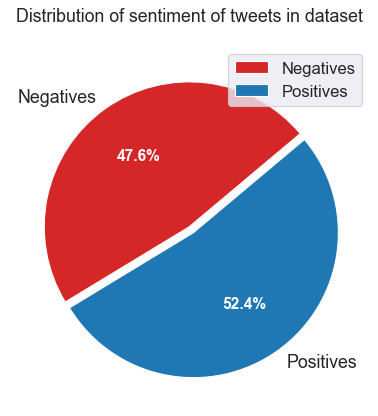

In [8]:
'''Plotting the distribution of negative and positive data in pie chart'''

explode1 = (0, 0.05)
labels = ('Negatives','Positives')

fig1, ax1 = plt.subplots(figsize=(6, 6), dpi=80)
_, _, autopcts = ax1.pie(counts,explode= explode1, labels=labels, autopct='%1.1f%%',
        shadow=False,startangle=40, colors=('tab:red', 'tab:blue'))

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':14})
ax1.set_title('Distribution of sentiment of tweets in dataset', fontdict={'fontsize': 16})
plt.legend( loc = 'upper right', labels=labels, fontsize=15)
plt.show()

In [9]:
'''Importing font and setting up font properties for wordcloud and word distribution visualization'''

font="gargi.ttf"
nepali_font = FontProperties(fname=font, size=18)

In [10]:
'''Extracting texts from dataset for wordcloud'''

cloud_text = ' '.join(tweets_df['cleaned_tweets'])

In [11]:
'''Defining function to plot graph of word frequency in given text'''

def wordFrequencyGraph(text, aspect):
    words_frequency = collections.Counter(text.split())
    words_frequency_df = pd.DataFrame(words_frequency.most_common(20)[4:], columns=["Word", "Frequency"])
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.set_yticklabels(words_frequency_df['Word'], fontproperties=nepali_font)
    for i, v in enumerate(words_frequency_df['Frequency'].sort_values()):
        ax.text(v + 2, i-0.10, str(v), color='black', fontweight='bold', fontsize=12)
    words_frequency_df.sort_values(by='Frequency').plot.barh(x="Word", y="Frequency", ax=ax, rot=45, color=(0.2, 0.4, 0.6, 0.6), fontsize=15, width=0.6)
    plt.title(f"Most Common {aspect}words in dataset")
    plt.ylabel("Words")
    plt.xlabel("Frequency")
    plt.show()

In [12]:
'''Defining function to plot wordcloud from text'''

def wordCloudPlot(cloud_text):
    wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="black", font_path=font, regexp=r"[\u0900-\u097F]+", collocations=False).generate(cloud_text)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

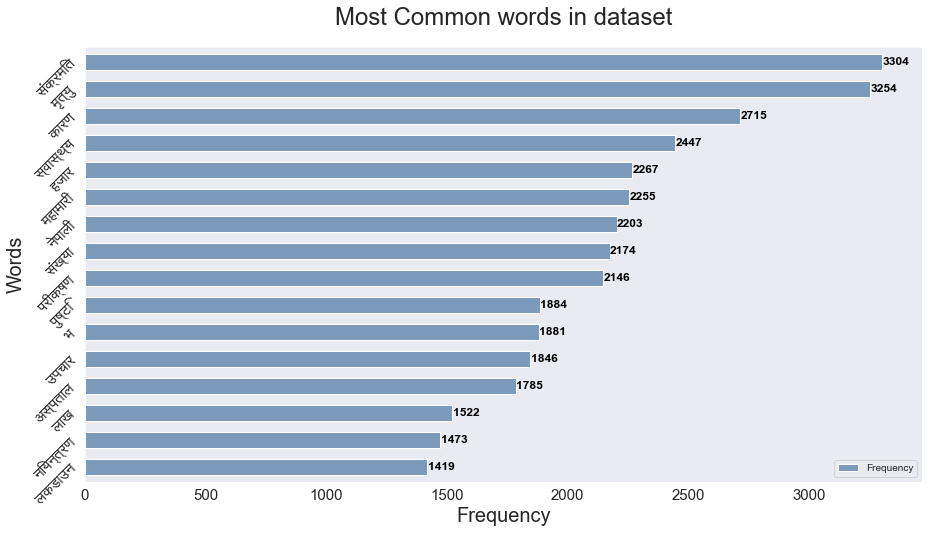

In [13]:
''' Plotting horizontal bar for most frequently used words in dataset'''

wordFrequencyGraph(cloud_text, "")

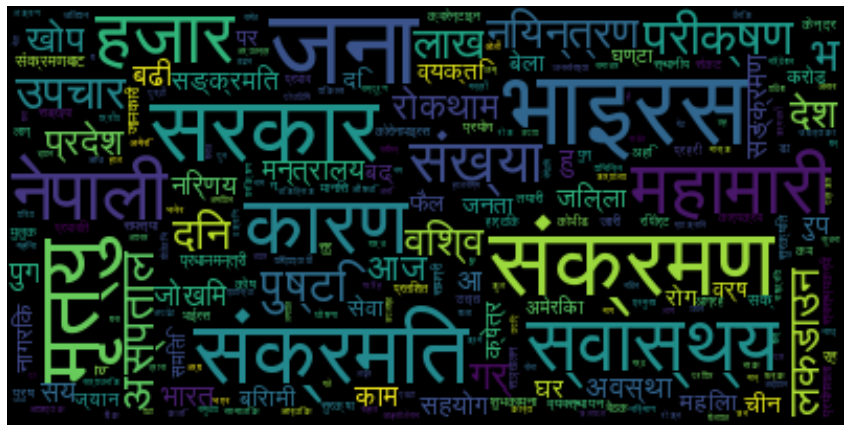

In [14]:
'''Plotting word cloud of all words'''

wordCloudPlot(cloud_text)

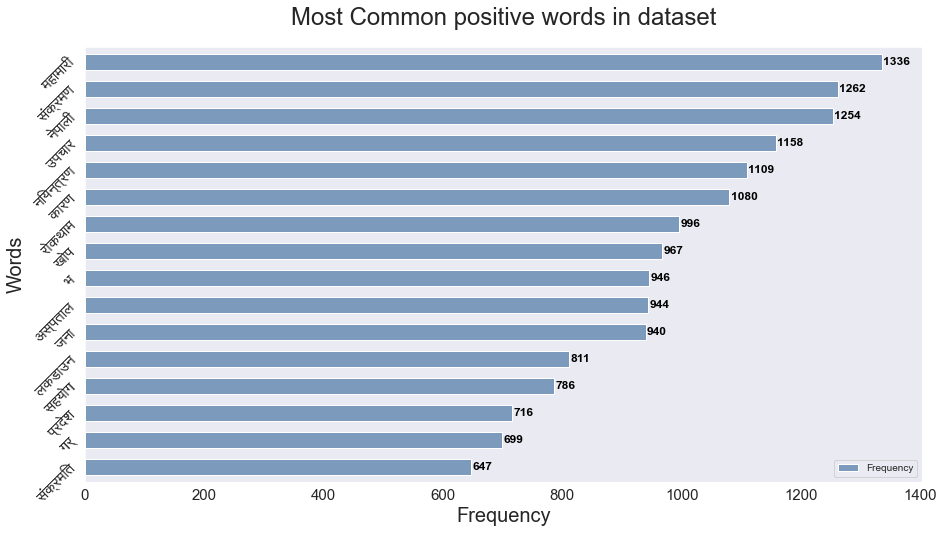

In [15]:
''' Plotting horizontal bar for most frequently used positive words in dataset'''

positive_reviews = tweets_df[tweets_df['label']==1]['cleaned_tweets']
cloud_text = ' '.join(positive_reviews)
wordFrequencyGraph(cloud_text, "positive ")

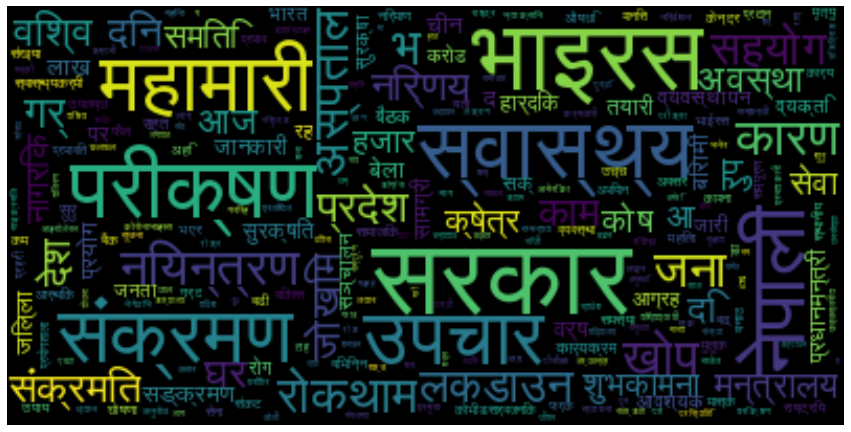

In [16]:
'''Plotting word cloud of positive words'''

wordCloudPlot(cloud_text)

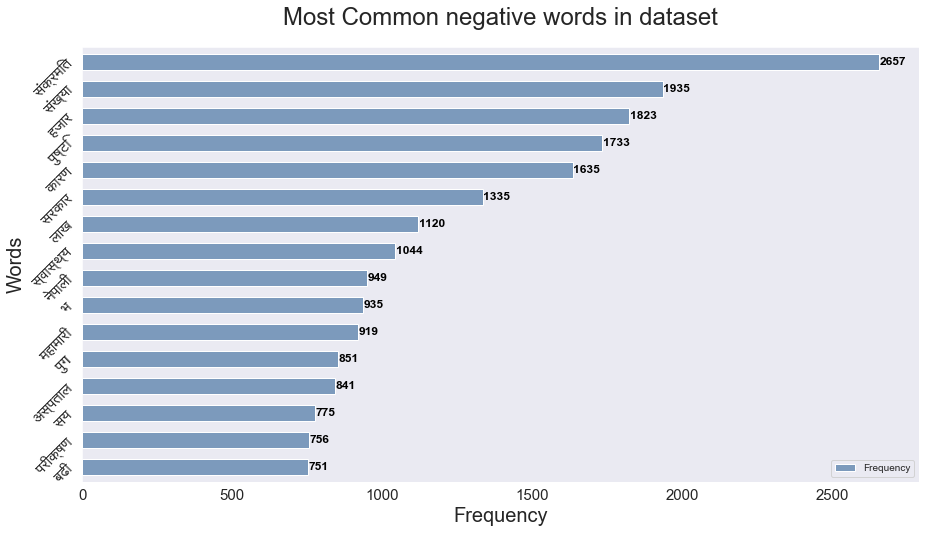

In [17]:
''' Plotting horizontal bar for most frequently used negative words in dataset'''

negative_reviews = tweets_df[tweets_df['label']==0]['cleaned_tweets']
cloud_text = ' '.join(negative_reviews)
wordFrequencyGraph(cloud_text, "negative ")

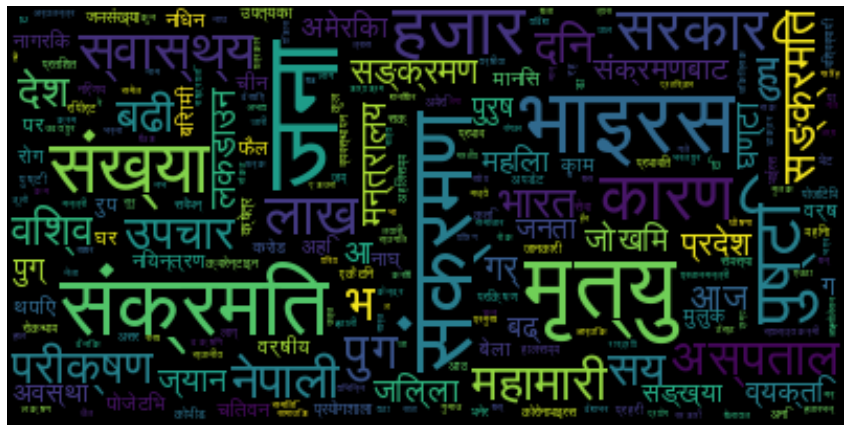

In [18]:
'''Plotting word cloud of negative words'''

wordCloudPlot(cloud_text)

In [19]:
'''Defining features and label from dataset for further classification'''

features = tweets_df['cleaned_tweets']
labels = tweets_df['label'].astype("int")

In [20]:
'''Splitting training and testing set using sklearn train_test_split'''

feature_train, feature_test, label_train, label_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print("The no of Training data: ", feature_train.shape[0])
print("The no of Testing data:",feature_test.shape[0])

The no of Training data:  22856
The no of Testing data: 5714


In [21]:
'''Frequency of negatives and positives in splitted data'''

(unique_train, counts_train) = np.unique(label_train, return_counts=True)
(unique_test, counts_test) = np.unique(label_test, return_counts=True)
distribution_df = pd.DataFrame(index=['Training Data', 'Test Data'], columns=['Positive', 'Negative'])
distribution_df['Negative'] = [counts_train[0], counts_test[0]]
distribution_df['Positive'] = [counts_train[1], counts_test[1]]
distribution_df

,Positive,Negative
Training Data,11984,10872
Test Data,2996,2718


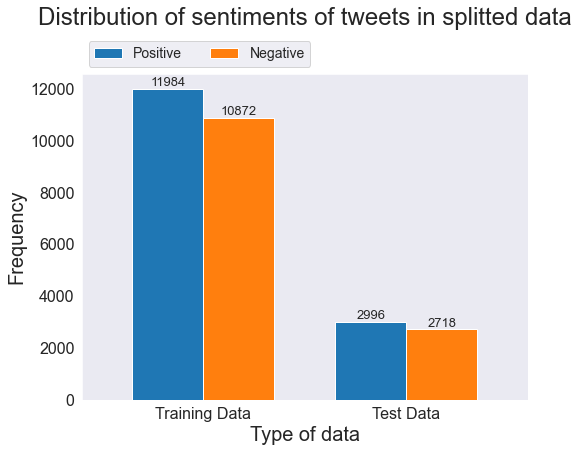

In [22]:
'''Plotting Frequency of negatives and positives in splitted data in bar chart'''

ax = distribution_df.plot.bar(rot=0, figsize=(8, 6), width=0.7)
ax.legend(ncol= 2, bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
for c in ax.containers:
    labels = [a if a else "" for a in c.datavalues]
    ax.bar_label(c,  fontsize=13)
plt.title(f"Distribution of sentiments of tweets in splitted data\n")
plt.xlabel("Type of data")
plt.ylabel("Frequency")
plt.show()

In [23]:
'''Defining different pipelines with different sklearn classification algorithms'''
from sklearn.feature_extraction.text import CountVectorizer
svm_model = Pipeline([('vect', TfidfVectorizer()), ('model', SVC())])
lr_model = Pipeline([('vect', TfidfVectorizer()), ('model', LogisticRegression())])
nb_model = Pipeline([('vect', TfidfVectorizer()), ('model', BernoulliNB())])
xgb_model = Pipeline([('vect', TfidfVectorizer()), ('model', XGBClassifier(objective="binary:logistic", random_state=42))])
mlp_model = Pipeline([('vect', TfidfVectorizer()), ('model', MLPClassifier(random_state=42))])
kn_model = Pipeline([('vect', TfidfVectorizer()), ('model', KNeighborsClassifier())])
dt_model = Pipeline([('vect', TfidfVectorizer()), ('model', DecisionTreeClassifier())])
rf_model = Pipeline([('vect', TfidfVectorizer()), ('model', RandomForestClassifier())])

# svm_model = Pipeline([('vect', CountVectorizer()), ('model', SVC())])
# lr_model = Pipeline([('vect', CountVectorizer()), ('model', LogisticRegression())])
# nb_model = Pipeline([('vect', CountVectorizer()), ('model', BernoulliNB())])
# xgb_model = Pipeline([('vect', CountVectorizer()), ('model', XGBClassifier(objective="binary:logistic", random_state=42))])
# mlp_model = Pipeline([('vect', CountVectorizer()), ('model', MLPClassifier(random_state=42))])
# kn_model = Pipeline([('vect', CountVectorizer()), ('model', KNeighborsClassifier())])
# dt_model = Pipeline([('vect', CountVectorizer()), ('model', DecisionTreeClassifier())])
# rf_model = Pipeline([('vect', CountVectorizer()), ('model', RandomForestClassifier())])


In [24]:
'''Defining models and model notations in list and dict'''

models = [svm_model, lr_model, nb_model, xgb_model, mlp_model, kn_model, dt_model, rf_model]
model_notations = {0:'Support Vector Machine', 1:'Logistic Regression', 2:'Nayve Bayes', 3:'XGB classifier', 4:'MLP classifier', 5:'K Neighbors', 6:'Decision Tree', 7:'Random Forest', 8:'LSTM Classifier'}

In [25]:
nepali_text=[["हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ"],["कोरोना ले कैयों को जागिर खोसिदियो"],["कोरोनाले ज्यान लियो"]]
accuracy, precision, recall, f1 = {}, {}, {}, {}

# Support Vector Machine 
---------------------------------
Accuracy:  0.7866643332166608

Classification report 
---------------------------------
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      2718
           1       0.78      0.84      0.80      2996

    accuracy                           0.79      5714
   macro avg       0.79      0.78      0.78      5714
weighted avg       0.79      0.79      0.79      5714

Confusion Martix 
 ------------------------------------


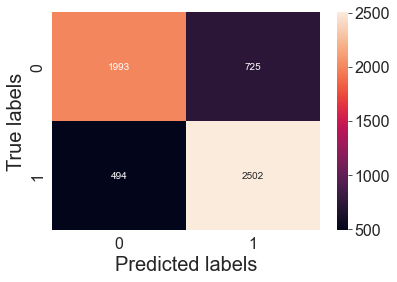

Manual Prediction
---------------------------------
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
कोरोनाले ज्यान लियो:  Negative

Support Vector Machine statistics
---------------------------------


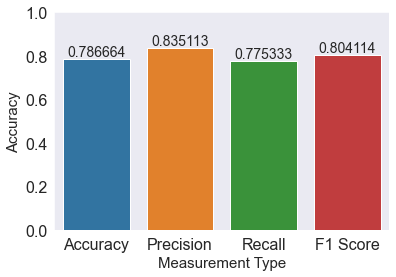


# Logistic Regression 
---------------------------------
Accuracy:  0.7604130206510326

Classification report 
---------------------------------
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2718
           1       0.76      0.80      0.78      2996

    accuracy                           0.76      5714
   macro avg       0.76      0.76      0.76      5714
weighted avg       0.76      0.76      0.76      5714

Confusion Martix 
 ------------------------------------


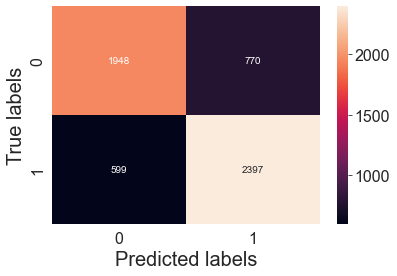

Manual Prediction
---------------------------------
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
कोरोनाले ज्यान लियो:  Negative

Logistic Regression statistics
---------------------------------


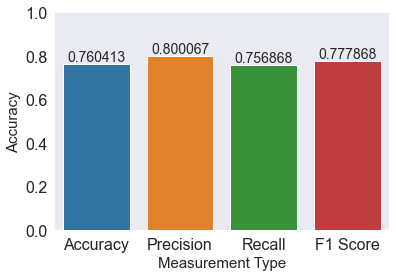


# Nayve Bayes 
---------------------------------
Accuracy:  0.7149107455372768

Classification report 
---------------------------------
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      2718
           1       0.75      0.69      0.72      2996

    accuracy                           0.71      5714
   macro avg       0.72      0.72      0.71      5714
weighted avg       0.72      0.71      0.72      5714

Confusion Martix 
 ------------------------------------


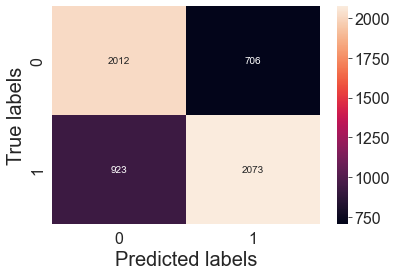

Manual Prediction
---------------------------------
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
कोरोनाले ज्यान लियो:  Negative

Nayve Bayes statistics
---------------------------------


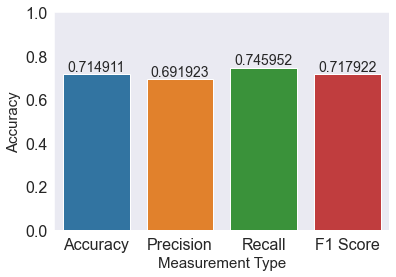


# XGB classifier 
---------------------------------
Accuracy:  0.7616380819040952

Classification report 
---------------------------------
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      2718
           1       0.75      0.82      0.78      2996

    accuracy                           0.76      5714
   macro avg       0.76      0.76      0.76      5714
weighted avg       0.76      0.76      0.76      5714

Confusion Martix 
 ------------------------------------


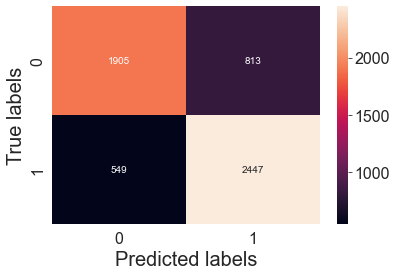

Manual Prediction
---------------------------------
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
कोरोनाले ज्यान लियो:  Negative

XGB classifier statistics
---------------------------------


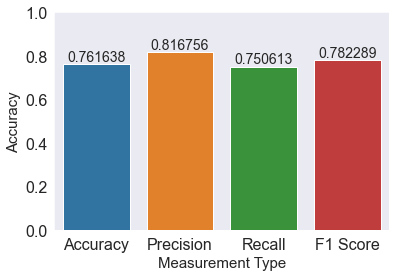


# MLP classifier 
---------------------------------
Accuracy:  0.7621631081554078

Classification report 
---------------------------------
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2718
           1       0.78      0.75      0.77      2996

    accuracy                           0.76      5714
   macro avg       0.76      0.76      0.76      5714
weighted avg       0.76      0.76      0.76      5714

Confusion Martix 
 ------------------------------------


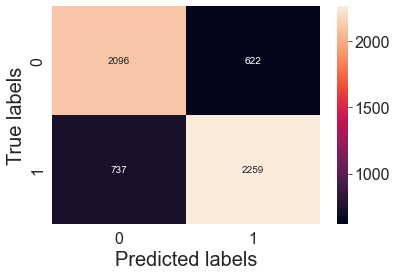

Manual Prediction
---------------------------------
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
कोरोनाले ज्यान लियो:  Negative

MLP classifier statistics
---------------------------------


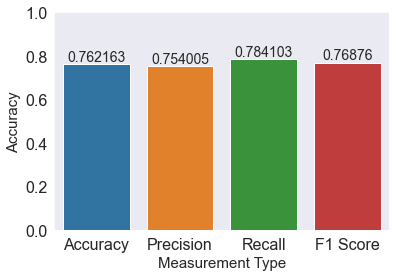


# K Neighbors 
---------------------------------
Accuracy:  0.6827091354567728

Classification report 
---------------------------------
              precision    recall  f1-score   support

           0       0.63      0.83      0.71      2718
           1       0.78      0.55      0.64      2996

    accuracy                           0.68      5714
   macro avg       0.70      0.69      0.68      5714
weighted avg       0.71      0.68      0.68      5714

Confusion Martix 
 ------------------------------------


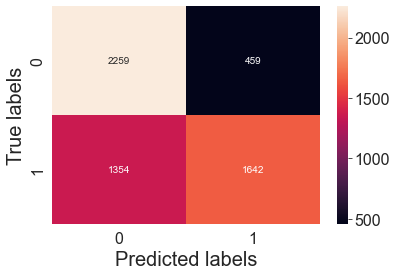

Manual Prediction
---------------------------------
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
कोरोनाले ज्यान लियो:  Negative

K Neighbors statistics
---------------------------------


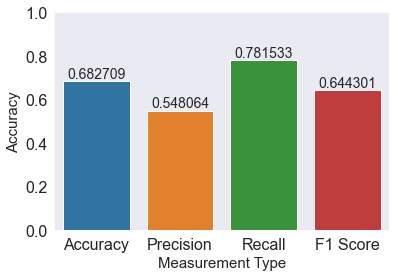


# Decision Tree 
---------------------------------
Accuracy:  0.7065103255162758

Classification report 
---------------------------------
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      2718
           1       0.72      0.72      0.72      2996

    accuracy                           0.71      5714
   macro avg       0.71      0.71      0.71      5714
weighted avg       0.71      0.71      0.71      5714

Confusion Martix 
 ------------------------------------


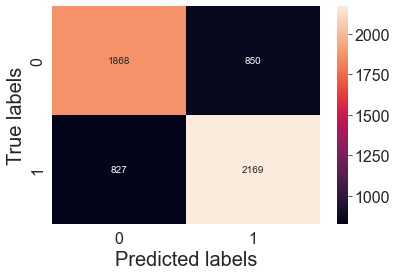

Manual Prediction
---------------------------------
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
कोरोनाले ज्यान लियो:  Negative

Decision Tree statistics
---------------------------------


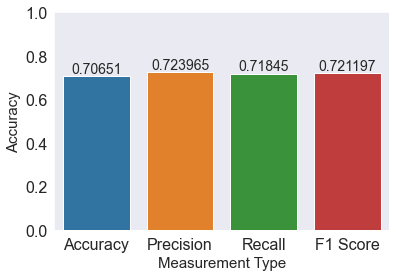


# Random Forest 
---------------------------------
Accuracy:  0.7758137906895345

Classification report 
---------------------------------
              precision    recall  f1-score   support

           0       0.81      0.69      0.74      2718
           1       0.75      0.86      0.80      2996

    accuracy                           0.78      5714
   macro avg       0.78      0.77      0.77      5714
weighted avg       0.78      0.78      0.77      5714

Confusion Martix 
 ------------------------------------


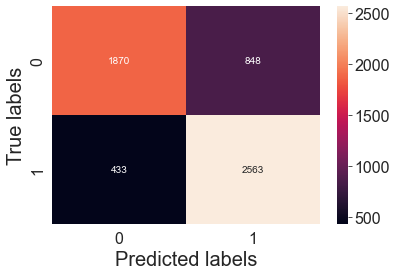

Manual Prediction
---------------------------------
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
कोरोनाले ज्यान लियो:  Negative

Random Forest statistics
---------------------------------


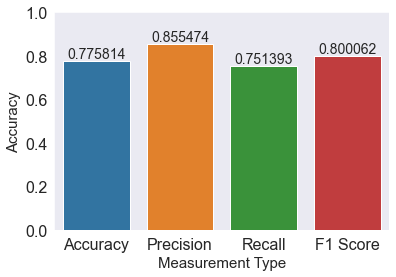

In [26]:
'''Testing models accuracy, recall, precision and f1 score visualizing them and many more'''


for i, model in enumerate(models):
    
    #Fitting training data to a model
    model.fit(feature_train,label_train)
    prediction = model.predict(feature_test)
    
    #storing different scores to different array for further analysis and visualization
    accuracy[model_notations[i]] = accuracy_score(prediction, label_test)
    precision[model_notations[i]] = precision_score(prediction, label_test)
    recall[model_notations[i]] = recall_score(prediction, label_test)
    f1[model_notations[i]] = f1_score(prediction, label_test)
    
    # Printing title, accuracy and classification report for each models
    print("================================================================================================================")
    print(f"# {model_notations[i]} \n---------------------------------")
    print(f'Accuracy:  {accuracy_score(prediction, label_test)}\n')
    print("Classification report \n---------------------------------")
    print(classification_report(label_test, prediction))
    print("Confusion Martix \n ------------------------------------")
    
    # Generating confusion matrix and plotting it to heatmap 
    conf_matr = pd.DataFrame(confusion_matrix(label_test, prediction))
    ax= plt.subplot()
    sns.heatmap(conf_matr, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
#     ax.set_title('Confusion Matrix')
    plt.show()
    
    # Predicting random sentences with each models
    print("Manual Prediction\n---------------------------------")
    for text in nepali_text:
        if np.squeeze(model.predict(text))==1: 
            print("%s: "%(np.squeeze(text)),"Positive")
        else:
            print("%s: "%(np.squeeze(text)),"Negative")
    
    
    # Plotting different scores of each models in bar graph
    print(f"\n{model_notations[i]} statistics\n---------------------------------")
    y_data=[accuracy[model_notations[i]], precision[model_notations[i]], recall[model_notations[i]], f1[model_notations[i]]]
    ax = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=y_data)
    ax.bar_label(ax.containers[0], fontsize=14)
    plt.ylim(0.0, 1.0)
#     plt.title(f'{model_notations[i]} statistics')
    plt.xlabel("Measurement Type", fontsize=15)
    plt.ylabel("Accuracy", fontsize=15)
    plt.show()
    
    print("\n================================================================================================================")

In [27]:
'''Defining variables for lstm'''

tweet_length = len(tweets_df)
# max_input_length = 48
max_input_length = 80
size_of_batch = 16
epos_count = 200
# data_length

In [28]:
'''Preprocessing training data by tokenizing and padding sequences for lstm model'''

lstm_tokenizer = Tokenizer(tweet_length)
# lstm_tokenizer = Tokenizer()
lstm_tokenizer.fit_on_texts(feature_train)
word_index=lstm_tokenizer.word_index
data_length = len(word_index)+1

feature_train = lstm_tokenizer.texts_to_sequences(feature_train)
feature_train = pad_sequences(feature_train, maxlen=max_input_length, truncating='post', padding='post')

feature_test = lstm_tokenizer.texts_to_sequences(feature_test)
feature_test = pad_sequences(feature_test, maxlen=max_input_length, truncating='post', padding='post')
# max_len = max([len(i) for i in feature_train])
# max_len
print(feature_train.shape, label_train.shape)
print(feature_test.shape, label_test.shape)

(22856, 80) (22856,)
(5714, 80) (5714,)


In [29]:
'''Encoding label data'''

le = LabelEncoder()
label_train = le.fit_transform(label_train)
label_test = le.transform(label_test)

In [30]:
'''Generating lstm model'''

lstm_model = Sequential()
lstm_model.add(Embedding(data_length, 16, input_length = max_input_length, trainable=True))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(8, return_sequences=True)),
lstm_model.add(GlobalMaxPooling1D()),
lstm_model.add(Dense(32, activation="relu")),
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation="sigmoid"))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 16)            488560    
                                                                 
 spatial_dropout1d (SpatialD  (None, 80, 16)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 80, 8)             800       
                                                                 
 global_max_pooling1d (Globa  (None, 8)                0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0

In [32]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.01, patience=4, verbose=1, restore_best_weights=True)

In [33]:
'''Fitting model for training and training model'''

history = lstm_model.fit(feature_train, label_train, validation_data = (feature_test, label_test), epochs=epos_count, batch_size=size_of_batch, callbacks=[es])

Epoch 1/200
1429/1429 [==============================] - 35s 23ms/step - loss: 0.5018 - accuracy: 0.7496 - val_loss: 0.3996 - val_accuracy: 0.8250
Epoch 2/200
1429/1429 [==============================] - 32s 23ms/step - loss: 0.3312 - accuracy: 0.8642 - val_loss: 0.4001 - val_accuracy: 0.8243
Epoch 3/200
1429/1429 [==============================] - 32s 22ms/step - loss: 0.2332 - accuracy: 0.9144 - val_loss: 0.4428 - val_accuracy: 0.8196
Epoch 4/200
1429/1429 [==============================] - 36s 25ms/step - loss: 0.1741 - accuracy: 0.9387 - val_loss: 0.5061 - val_accuracy: 0.8182
Epoch 5/200
1429/1429 [==============================] - 38s 27ms/step - loss: 0.1370 - accuracy: 0.9550 - val_loss: 0.5732 - val_accuracy: 0.8110
Epoch 5: early stopping


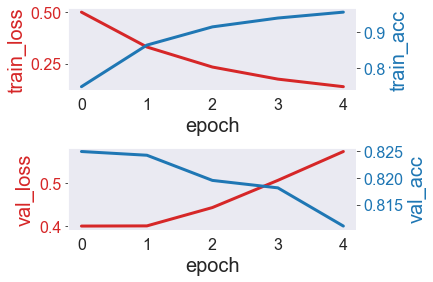

In [34]:
from tensorflow_history_plot import show_acc
show_acc.plot(history)

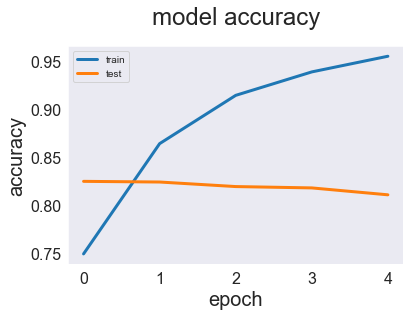

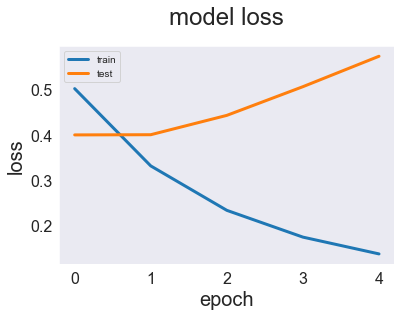

In [35]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
'''Predicting sentiment for random words with lstm model'''

for text in nepali_text:
    text_tokened = lstm_tokenizer.texts_to_sequences(text)
    text_padded = pad_sequences(text_tokened, maxlen=max_input_length, truncating='post', padding='post')
    if np.squeeze(lstm_model.predict(text_padded))>=0.5: 
        print("%s: "%(np.squeeze(text)),"Positive")
    else:
        print("%s: "%(np.squeeze(text)),"Negative")

1/1 [==============================] - 0s 342ms/step
हामिले कोरोना लागेको मान्छेलाई सहयोग गर्नुपर्छ:  Positive
1/1 [==============================] - 0s 15ms/step
कोरोना ले कैयों को जागिर खोसिदियो:  Negative
1/1 [==============================] - 0s 14ms/step
कोरोनाले ज्यान लियो:  Negative


In [37]:
scores = lstm_model.evaluate(feature_test, label_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
scores

Accuracy: 82.50%


[0.399648517370224, 0.8249912261962891]

In [38]:
'''Calculating different scores for lstm model (accuracy, precision, recall, f1)'''

lstm_prediction = lstm_model.predict(feature_test)
lstm_prediction = [int(val>0.5) for val in lstm_prediction]
accuracy['LSTM Model'] = accuracy_score(lstm_prediction, label_test)
precision['LSTM Model'] = precision_score(lstm_prediction, label_test)
recall['LSTM Model'] = recall_score(lstm_prediction, label_test)
f1['LSTM Model'] = f1_score(lstm_prediction, label_test)
print('accuracy %s' % accuracy_score(lstm_prediction, label_test))
print(classification_report(label_test, lstm_prediction))

179/179 [==============================] - 1s 4ms/step
accuracy 0.8249912495624782
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2718
           1       0.81      0.87      0.84      2996

    accuracy                           0.82      5714
   macro avg       0.83      0.82      0.82      5714
weighted avg       0.83      0.82      0.82      5714



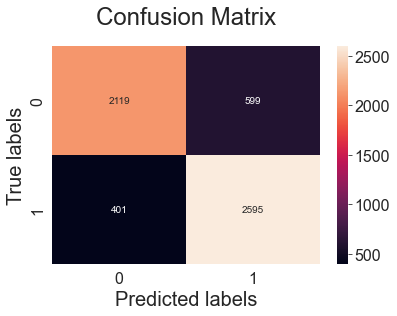

In [39]:
'''Creating confusion matrix and plotting into heatmap for predicted test results '''

conf_matr = pd.DataFrame(confusion_matrix(label_test, lstm_prediction))
ax= plt.subplot()
sns.heatmap(conf_matr, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
plt.show()

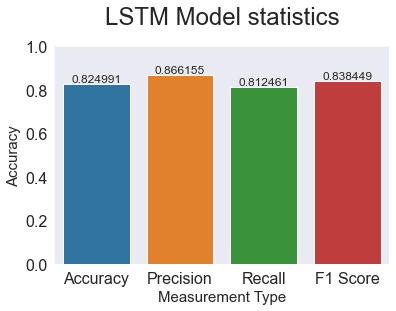

In [40]:
''' # Plotting different scores of lstm model in bar graph'''

ax = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1 Score'], y=[accuracy['LSTM Model'], precision['LSTM Model'], recall['LSTM Model'], f1['LSTM Model']])
ax.bar_label(ax.containers[0], fontsize=12)
plt.ylim(0.0, 1.0)
plt.title(f'LSTM Model statistics')
plt.xlabel("Measurement Type", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.show()

In [41]:
'''Generating dataframe for all models for accuracy, precision, recall and f1'''

result_df = pd.DataFrame(index=model_notations.values(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
result_df['Accuracy'] = accuracy.values()
result_df['Precision'] = precision.values()
result_df['Recall'] = recall.values()
result_df['F1'] = f1.values()
result_df

,Accuracy,Precision,Recall,F1
Support Vector Machine,0.786664,0.835113,0.775333,0.804114
Logistic Regression,0.760413,0.800067,0.756868,0.777868
Nayve Bayes,0.714911,0.691923,0.745952,0.717922
XGB classifier,0.761638,0.816756,0.750613,0.782289
MLP classifier,0.762163,0.754005,0.784103,0.768760
K Neighbors,0.682709,0.548064,0.781533,0.644301
Decision Tree,0.706510,0.723965,0.718450,0.721197
Random Forest,0.775814,0.855474,0.751393,0.800062
LSTM Classifier,0.824991,0.866155,0.812461,0.838449


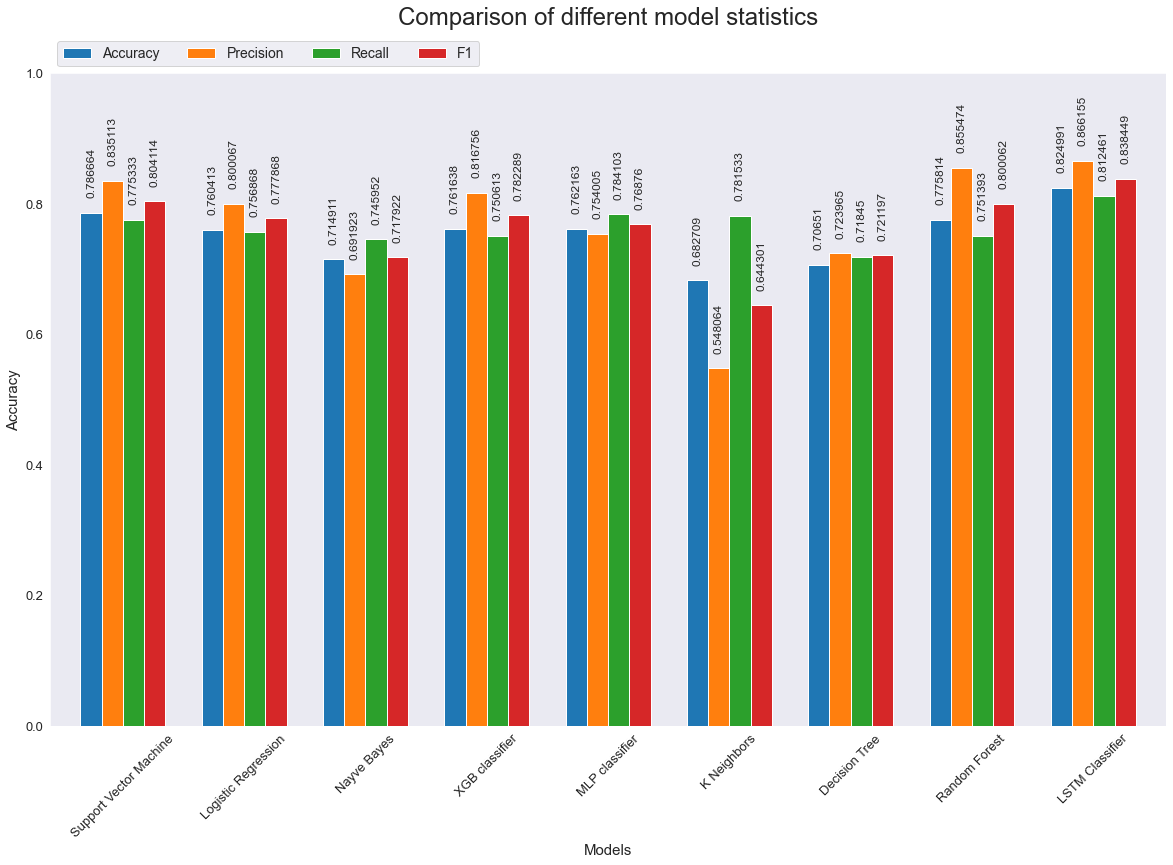

In [42]:
'''Plotting and comparing different scores of different models with the help of bar chart'''

ax = result_df.plot.bar(rot=45, figsize=(20, 12), fontsize=13, width=0.7)
ax.legend(ncol= len(model_notations.values()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
for c in ax.containers:
    labels = [a if a else "" for a in c.datavalues]
    ax.bar_label(c,  fontsize=12, rotation="vertical", padding=15)
plt.title(f'Comparison of different model statistics\n')
plt.xlabel("Models", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.ylim(0.0, 1.0)
plt.show()